In [1]:
#imports
import geopandas
import pandas as pd
import numpy as np
import os
import datetime as dt

import tifffile
import string

from shapely.geometry import Point, LineString

import scimap as sm

c:\Users\jnimoca\Jose_BI\Anaconda\envs\scimap5\lib\site-packages\tqdm\auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



In [2]:
os.getcwd()

'c:\\Users\\jnimoca\\Jose_BI\\Projects---Repositories\\9_Qupath_to_AnnData\\QuPath_Annotation_to_AnnData'

In [3]:
os.listdir()

['.git',
 'LICENSE',
 'QuPath_to_Anndata.ipynb',
 'README.md',
 'TestData(MCMICROExemplar001)']

In [4]:
path_to_geojson = r'./TestData(MCMICROExemplar001)/Test_QuPath_Project/Exemplar001_subset.geojson'

In [5]:
df = geopandas.read_file(path_to_geojson)

In [6]:
df.head()

,id,objectType,classification,geometry
0,6fbbca87-42f3-4633-ab10-87a6e88c77ad,annotation,"{'name': 'Immune_Cluster', 'color': [55, 46, 21]}","POLYGON ((852.00000 400.00000, 850.00000 401.0..."
1,6a957ec1-4a70-4886-af48-2dfa302b7456,annotation,"{'name': 'Immune_Cluster', 'color': [55, 46, 21]}","POLYGON ((953.00000 598.00000, 951.00000 599.0..."
2,7eb79eb4-241f-4929-a4c9-3a83623df6a0,annotation,"{'name': 'Immune_Cluster', 'color': [55, 46, 21]}","POLYGON ((679.00000 644.00000, 677.00000 645.0..."
3,a09a6107-ffe2-4190-a131-f8553e24fa8d,annotation,"{'name': 'Epithelial_Cluster', 'color': [42, 2...","POLYGON ((305.00000 204.00000, 304.00000 204.5..."
4,89e85395-65dd-438b-9231-ba2160e22081,annotation,"{'name': 'Epithelial_Cluster', 'color': [42, 2...","POLYGON ((133.00000 607.00000, 126.00000 608.0..."


In [7]:
#load adata using scimap
path_to_csv = r'TestData(MCMICROExemplar001)\quantification\Exemplar001_subset--unmicst_cell.csv'
adata = sm.pp.mcmicro_to_scimap(path_to_csv)

Loading Exemplar001_subset--unmicst_cell.csv


In [11]:
adata.obs[['X_centroid', 'Y_centroid']]

,X_centroid,Y_centroid
Exemplar001_subset--unmicst_cell_1,843.522727,102.193182
Exemplar001_subset--unmicst_cell_2,704.806122,111.214286
Exemplar001_subset--unmicst_cell_3,740.188119,111.495050
Exemplar001_subset--unmicst_cell_4,830.303571,111.714286
Exemplar001_subset--unmicst_cell_5,876.942708,116.653646
...,...,...
Exemplar001_subset--unmicst_cell_3105,1496.194444,952.763889
Exemplar001_subset--unmicst_cell_3106,896.326531,953.367347
Exemplar001_subset--unmicst_cell_3107,1206.057971,953.217391
Exemplar001_subset--unmicst_cell_3108,751.673913,953.456522


In [16]:
print( adata.obs.X_centroid.max(),
adata.obs.X_centroid.min(),
adata.obs.Y_centroid.max(),
adata.obs.Y_centroid.min())

1828.7128712871288 2.075 953.595238095238 102.1931818181818


In [13]:
import skimage.io as io

In [14]:
image = io.imread(r'TestData(MCMICROExemplar001)\registration\Exemplar001_subset.tif')

In [15]:
image.shape

(12, 957, 1833)

In [ ]:
#we need a pixel to um conversion factor
#no we dont

In [18]:
geometry=geopandas.points_from_xy(adata.obs.X_centroid, adata.obs.Y_centroid)

In [19]:
geometry

<GeometryArray>
 ...
Length: 3109, dtype: geometry

In [21]:
df.geometry[0].contains(geometry[0])

False

In [22]:
df.head()

,id,objectType,classification,geometry
0,6fbbca87-42f3-4633-ab10-87a6e88c77ad,annotation,"{'name': 'Immune_Cluster', 'color': [55, 46, 21]}","POLYGON ((852.00000 400.00000, 850.00000 401.0..."
1,6a957ec1-4a70-4886-af48-2dfa302b7456,annotation,"{'name': 'Immune_Cluster', 'color': [55, 46, 21]}","POLYGON ((953.00000 598.00000, 951.00000 599.0..."
2,7eb79eb4-241f-4929-a4c9-3a83623df6a0,annotation,"{'name': 'Immune_Cluster', 'color': [55, 46, 21]}","POLYGON ((679.00000 644.00000, 677.00000 645.0..."
3,a09a6107-ffe2-4190-a131-f8553e24fa8d,annotation,"{'name': 'Epithelial_Cluster', 'color': [42, 2...","POLYGON ((305.00000 204.00000, 304.00000 204.5..."
4,89e85395-65dd-438b-9231-ba2160e22081,annotation,"{'name': 'Epithelial_Cluster', 'color': [42, 2...","POLYGON ((133.00000 607.00000, 126.00000 608.0..."


In [26]:
def get_contour_type(df):
    df['Name'] = np.nan
    for i in df.index:
        tmp = df.classification[i].get('name')
        df.at[i,'Name'] = tmp
    return(df)

In [27]:
get_contour_type(df)

,id,objectType,classification,geometry,Name
0,6fbbca87-42f3-4633-ab10-87a6e88c77ad,annotation,"{'name': 'Immune_Cluster', 'color': [55, 46, 21]}","POLYGON ((852.00000 400.00000, 850.00000 401.0...",Immune_Cluster
1,6a957ec1-4a70-4886-af48-2dfa302b7456,annotation,"{'name': 'Immune_Cluster', 'color': [55, 46, 21]}","POLYGON ((953.00000 598.00000, 951.00000 599.0...",Immune_Cluster
2,7eb79eb4-241f-4929-a4c9-3a83623df6a0,annotation,"{'name': 'Immune_Cluster', 'color': [55, 46, 21]}","POLYGON ((679.00000 644.00000, 677.00000 645.0...",Immune_Cluster
3,a09a6107-ffe2-4190-a131-f8553e24fa8d,annotation,"{'name': 'Epithelial_Cluster', 'color': [42, 2...","POLYGON ((305.00000 204.00000, 304.00000 204.5...",Epithelial_Cluster
4,89e85395-65dd-438b-9231-ba2160e22081,annotation,"{'name': 'Epithelial_Cluster', 'color': [42, 2...","POLYGON ((133.00000 607.00000, 126.00000 608.0...",Epithelial_Cluster
5,e68f0abc-f336-4c95-b179-0e395b0f93ff,annotation,"{'name': 'Epithelial_Cluster', 'color': [42, 2...","POLYGON ((615.00000 92.00000, 609.00000 93.000...",Epithelial_Cluster
6,4315eae2-6a9c-45b4-a004-e7c9bdafda1f,annotation,"{'name': 'Ignore_from_analysis', 'color': [18,...","POLYGON ((1387.00000 233.00000, 1803.00000 233...",Ignore_from_analysis


In [28]:
df.Name.unique()

array(['Immune_Cluster', 'Epithelial_Cluster', 'Ignore_from_analysis'],
      dtype=object)

In [37]:
adata.obs.ROI

Exemplar001_subset--unmicst_cell_1      NaN
Exemplar001_subset--unmicst_cell_2      NaN
Exemplar001_subset--unmicst_cell_3      NaN
Exemplar001_subset--unmicst_cell_4      NaN
Exemplar001_subset--unmicst_cell_5      NaN
                                         ..
Exemplar001_subset--unmicst_cell_3105   NaN
Exemplar001_subset--unmicst_cell_3106   NaN
Exemplar001_subset--unmicst_cell_3107   NaN
Exemplar001_subset--unmicst_cell_3108   NaN
Exemplar001_subset--unmicst_cell_3109   NaN
Name: ROI, Length: 3109, dtype: float64

In [38]:
df.head()

,id,objectType,classification,geometry,Name
0,6fbbca87-42f3-4633-ab10-87a6e88c77ad,annotation,"{'name': 'Immune_Cluster', 'color': [55, 46, 21]}","POLYGON ((852.00000 400.00000, 850.00000 401.0...",Immune_Cluster
1,6a957ec1-4a70-4886-af48-2dfa302b7456,annotation,"{'name': 'Immune_Cluster', 'color': [55, 46, 21]}","POLYGON ((953.00000 598.00000, 951.00000 599.0...",Immune_Cluster
2,7eb79eb4-241f-4929-a4c9-3a83623df6a0,annotation,"{'name': 'Immune_Cluster', 'color': [55, 46, 21]}","POLYGON ((679.00000 644.00000, 677.00000 645.0...",Immune_Cluster
3,a09a6107-ffe2-4190-a131-f8553e24fa8d,annotation,"{'name': 'Epithelial_Cluster', 'color': [42, 2...","POLYGON ((305.00000 204.00000, 304.00000 204.5...",Epithelial_Cluster
4,89e85395-65dd-438b-9231-ba2160e22081,annotation,"{'name': 'Epithelial_Cluster', 'color': [42, 2...","POLYGON ((133.00000 607.00000, 126.00000 608.0...",Epithelial_Cluster


In [53]:
#def annotate_cells_by_ROI(adata, df):
    adata.obs['ROI'] = "Unclassified" #works
    cellpoints = geopandas.points_from_xy(adata.obs.X_centroid, adata.obs.Y_centroid) #works
    for cell_in_adata in adata.obs.index: #for each cell in the adata
        for Qupath_Annotation in df.index: #for each row in the ROI table
            if df.geometry[Qupath_Annotation].contains(cellpoints[cell_in_adata]): #if the cell is in the ROI
                adata.obs.at[cell_in_adata,'ROI'] = df.Name[Qupath_Annotation] #add the ROI name to the adata  
    #return(adata)
    

IndentationError: unexpected indent (1960306730.py, line 2)

In [79]:
#def annotate_cells_by_ROI(adata, df):
adata.obs['ROI'] = "Unclassified" #works
cellpoints = geopandas.points_from_xy(adata.obs.X_centroid, adata.obs.Y_centroid) #works
for cell_point,adata_row in zip(cellpoints,adata.obs.index): #for each cell in the adata
    for Qupath_Annotation in df.index: #for each row in the ROI table
        if df.geometry[Qupath_Annotation].contains(cell_point):
            adata.obs.at[adata_row,'ROI'] = df.Name[Qupath_Annotation]
    

In [80]:
adata.obs.ROI.unique()

array(['Unclassified', 'Epithelial_Cluster', 'Ignore_from_analysis',
       'Immune_Cluster'], dtype=object)

In [69]:
for Qupath_Annotation in df.index:
    print(df['geometry'][Qupath_Annotation].contains(cellpoints[1225]))

True
False
False
False
False
False
False


In [70]:
for 
for Qupath_Annotation in df.index:
    if df['geometry'][Qupath_Annotation].contains(cellpoints[1225]):
        print('yes')

yes


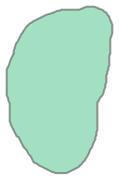

In [63]:
df['geometry'][0]

In [51]:
annotate_cells_by_ROI(adata, df)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
if df.geometry[Qupath_Annotation].contains(cellpoints[cell_in_adata]):
                adata.obs.at[cell_in_adata,'ROI'] = df.Name[Qupath_Annotation]

In [39]:
cellpoints = geopandas.points_from_xy(adata.obs.X_centroid, adata.obs.Y_centroid)

In [45]:
if df.geometry[0].contains(cellpoints[90]):
    print('yes')
else:
    print('no')

no


In [34]:
annotate_cells_by_ROI(adata, df)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [30]:
adata

AnnData object with n_obs × n_vars = 3109 × 9
    obs: 'X_centroid', 'Y_centroid', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Solidity', 'Extent', 'Orientation', 'CellID', 'imageid', 'Immune_Cluster', 'Epithelial_Cluster', 'Ignore_from_analysis'
    uns: 'all_markers'